In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u

import gala.coordinates as gc
import gala.potential as gp
import gala.dynamics as gd

import pickle

In [2]:
plt.style.use('notebook')

In [3]:
ham = gp.Hamiltonian(gp.MilkyWayPotential())

coord.galactocentric_frame_defaults.set('v4.0')
gc_frame = coord.Galactocentric()

I've saved a coordinates object with members of the GD-1 stream in a pickle file. Pickle is a more flexible format than fits, so you can pretty much save anything in a pickle, as opposed to fits where you need to create a table. The syntax for reading the pickle file is this:

In [4]:
ceq = pickle.load(open('../data/members_gd1.pkl', 'rb'))

We can check `ceq` and see that indeed it is a `SkyCoord` object with sky coordinates for 911 GD-1 stars:

In [5]:
ceq

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(221.42650143, 57.42612126, 11.07657691),
     (222.06055045, 57.55143001, 11.1222883 ),
     (223.0830276 , 58.0738502 , 11.19009946),
     (218.49322673, 58.37373205, 10.85312392),
     (213.4146397 , 58.02769201, 10.50739505),
     (215.33212709, 58.10487224, 10.63601478),
     (214.44631909, 58.47109091, 10.57635305),
     (220.70108385, 57.63806005, 11.01972469),
     (219.53135472, 58.6843389 , 10.92335102),
     (185.79794746, 56.77120657,  9.00376741),
     (183.82678745, 55.95477218,  8.89661809),
     (183.48780651, 56.1022078 ,  8.88849837),
     (183.88753077, 56.16451572,  8.90632576),
     (183.87346631, 56.20428281,  8.90716271),
     (192.20744023, 57.06218748,  9.29259769),
     (192.50746857, 57.26812566,  9.31273192),
     (195.63485151, 57.34692765,  9.46544724),
     (195.52459273, 57.54472486,  9.46535952),
     (195.18054159, 57.89562726,  9.4581254 ),
     (193.0907817 , 57.3241064 ,  9.34174352),
   

To convert to Galactocentric coordinates, we use the same `transform_to` function as before:

In [6]:
cgal = ceq.transform_to(coord.Galactocentric)

Now, all that's left to do is plot positions of GD-1 stars in Galactic coordinates (`'r*'` format here means that the data points will be red stars, for more marker styles and colors, check the pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html):

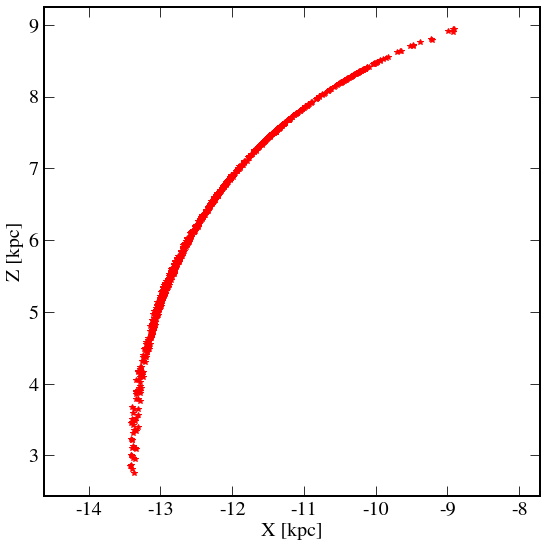

In [7]:
plt.plot(cgal.x, cgal.z, 'r*')

plt.xlabel('X [kpc]')
plt.ylabel('Z [kpc]')

plt.gca().set_aspect('equal', adjustable='datalim')
plt.tight_layout()